In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import os
from glob import glob
from time import time
from utils import *
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K


if K.image_data_format() == 'channels_first':
    K.set_image_data_format('channels_last')
print(K.image_data_format())

tf.__version__

channels_last


'2.10.0'

### loading model

In [7]:
model = ResNet50(include_top=True, weights='imagenet')
input_shape = model.layers[0].output_shape[0][1:3]
# model.summary()

### load grating and flow images

In [76]:
# from deepnettools import createFlowDataset

orig_shape = (800,600)
scl_factor = 0.5

mydirs = ['0','45','90','135'] #choose a few directions
categories = ['grat_W12','grat_W2','neg1dotflow_D2_bg','pos3dotflow_D2_bg']

topdir = 'flowstims'
N_INSTANCES = 1
trial_len = 1
stride = 1

flow_datasets = createFlowDataset(categories, topdir, mydirs, orig_shape, input_shape, scl_factor, N_INSTANCES, trial_len, stride)

*INSTANCE 0 ....


#### Classify example frames from gratings and flows

16


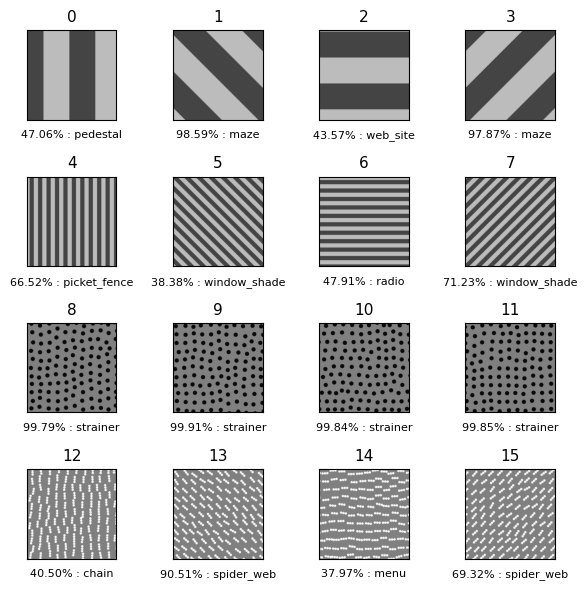

In [77]:
which_insts = [0]
dataset = np.concatenate([flow_datasets[ii] for ii in which_insts],0)
def reshape_flow_img(raveled_1chan_img):
    return np.moveaxis(np.tile(raveled_1chan_img.reshape(input_shape),(3,1,1)),0,-1)
dataset = np.array([reshape_flow_img(im) \
     for im in dataset])
print(dataset.shape[0])
predict_images(dataset, 1.5, nrows=4)

#### Classify ImageNet examples

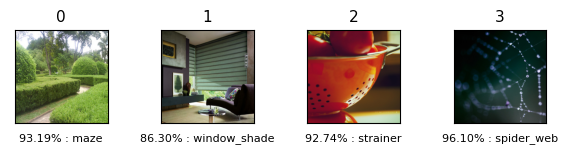

In [75]:
top_folder = 'imgnet'
imgs = [f'{top_folder}/ILSVRC2012_test_00083932.JPEG',
        f'{top_folder}/ILSVRC2012_test_00049097.JPEG',
        f'{top_folder}/ILSVRC2012_test_00028559.JPEG',
        f'{top_folder}/ILSVRC2012_test_00053036.JPEG',
       ]
predict_images(imgs, 1.5, 1)